In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

read_truth = open("truth.txt", "r")

truth = [line.rstrip() for line in read_truth.readlines()]
truthJedi = [line for line in truth if "Jedi" in line]
truthSith = [line for line in truth if "Sith" in line]

read_truth.close()


In [22]:
read_predictions = open("predictions.txt", "r")

predictions = [line.rstrip() for line in read_predictions.readlines()]
predictionsJedi = [line for line in predictions if "Jedi" in line]
predictionsSith = [line for line in predictions if "Sith" in line]

read_predictions.close()


In [18]:
data = pd.DataFrame({
    "truth": truth,
    "predictions": predictions
})

jedi_negatif = data[(data["truth"] == "Jedi") & (data["predictions"] == "Sith")]
sith_negatif = data[(data["truth"] == "Sith") & (data["predictions"] == "Jedi")]
jedi_positif = data[(data["truth"] == "Jedi") & (data["predictions"] == "Jedi")]
sith_positif = data[(data["truth"] == "Sith") & (data["predictions"] == "Sith")]

length_jedi_negatif = len(jedi_negatif)
length_sith_negatif = len(sith_negatif)
length_jedi_positif = len(jedi_positif)
length_sith_positif = len(sith_positif)

confusion_matrix = [
    [length_jedi_positif, length_jedi_negatif],
    [length_sith_negatif, length_sith_positif]
]

print("Confusion Matrix:", confusion_matrix)


Confusion Matrix: [[25, 24], [30, 21]]


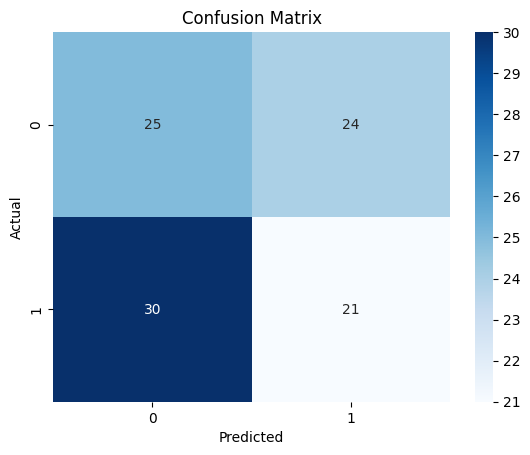

In [19]:
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
precision_jedi = length_jedi_positif / (length_jedi_positif + length_sith_negatif) if (length_jedi_positif + length_sith_negatif) > 0 else 0
precision_sith = length_sith_positif / (length_sith_positif + length_jedi_negatif) if (length_sith_positif + length_jedi_negatif) > 0 else 0
recall_jedi = length_jedi_positif / (length_jedi_positif + length_jedi_negatif) if (length_jedi_positif + length_jedi_negatif) > 0 else 0
recall_sith = length_sith_positif / (length_sith_positif + length_sith_negatif) if (length_sith_positif + length_sith_negatif) > 0 else 0
f1_score_jedi = 2 * (precision_jedi * recall_jedi) / (precision_jedi + recall_jedi) if (precision_jedi + recall_jedi) > 0 else 0
f1_score_sith = 2 * (precision_sith * recall_sith) / (precision_sith + recall_sith) if (precision_sith + recall_sith) > 0 else 0

accuracy = (length_jedi_positif + length_sith_positif) / (length_jedi_positif + length_sith_positif + length_jedi_negatif + length_sith_negatif) if (length_jedi_positif + length_sith_positif + length_jedi_negatif + length_sith_negatif) > 0 else 0

total = len(truth)
total_jedi = len(truthJedi)
total_sith = len(truthSith)

table_metrics = pd.DataFrame(columns=["Precision", "Recall", "F1 Score", "Total"], index=["Jedi", "Sith", "Accuracy"])
table_metrics.loc["Jedi"] = [round(precision_jedi, 2), round(recall_jedi, 2), round(f1_score_jedi, 2), total_jedi]
table_metrics.loc["Sith"] = [round(precision_sith, 2), round(recall_sith, 2), round(f1_score_sith, 2), total_sith]
table_metrics.loc["Accuracy"] = ["", "", round(accuracy, 2), total]
print(table_metrics)


         Precision Recall F1 Score Total
Jedi          0.45   0.51     0.48    49
Sith          0.47   0.41     0.44    51
Accuracy                      0.46   100
